##  Загрузка данных, исследовательский анализ данных (EDA)

### Импорт библиотек

In [127]:
import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
import matplotlib
import warnings

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from plotly import graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [128]:
data = pd.read_csv('train.csv')
def dataframe(data):
    return display(data.head(),
                   data.info(),
                   data.describe(),
                   data.duplicated().sum(),
                   pd.concat([data.isna().sum(),
                              data.isna().mean()],
                             axis=1)
                   .rename(columns={0:'кол-во', 1:'доля'})
                   .style.format({'кол-во':'{:.0f}', 'доля':'{:.1%}'})
                  )
dataframe(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


0

,кол-во,доля
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,177,19.9%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,0,0.0%


In [129]:
data1 = pd.read_csv('test.csv')
dataframe(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,"1,100.50",2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,"1,100.50",3.00,27.00,0.00,0.00,14.45
75%,"1,204.75",3.00,39.00,1.00,0.00,31.50
max,"1,309.00",3.00,76.00,8.00,9.00,512.33


0

,кол-во,доля
PassengerId,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,86,20.6%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,1,0.2%
Cabin,327,78.2%


In [130]:
df2 = pd.read_csv('gender_submission.csv')
dataframe(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


None

,PassengerId,Survived
count,418.00,418.00
mean,"1,100.50",0.36
std,120.81,0.48
min,892.00,0.00
25%,996.25,0.00
50%,"1,100.50",0.00
75%,"1,204.75",1.00
max,"1,309.00",1.00


0

,кол-во,доля
PassengerId,0,0.0%
Survived,0,0.0%


Удалим столбцы с категориальными данными, потом обработаем их(когда скажут зачем).

In [131]:
df = data.drop(columns=['PassengerId','Name','Sex','Cabin','Embarked'])
df1 = data1.drop(columns=['PassengerId','Name','Sex','Cabin','Embarked'])

In [132]:
df = df.dropna(subset=['Age']).reset_index(drop=True)
df1 = df1.dropna(subset=['Age']).reset_index(drop=True)

In [133]:
X_train = df.drop('Ticket', axis =1)
y_train = df['Ticket']

In [134]:
X_test = df1.drop('Ticket', axis =1)
y_test = df1['Ticket']

In [135]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [136]:
X_test

,Pclass,Age,SibSp,Parch,Fare
0,3,34.50,0,0,7.83
1,3,47.00,1,0,7.00
2,2,62.00,0,0,9.69
3,3,27.00,0,0,8.66
4,3,22.00,1,1,12.29
...,...,...,...,...,...
327,3,3.00,1,1,13.78
328,1,37.00,1,0,90.00
329,3,28.00,0,0,7.78
330,1,39.00,0,0,108.90


## Кластеризация 

### Стандартизация данных

In [137]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_train)

### Построение матрицы расстояний, отрисовка дендрограммы

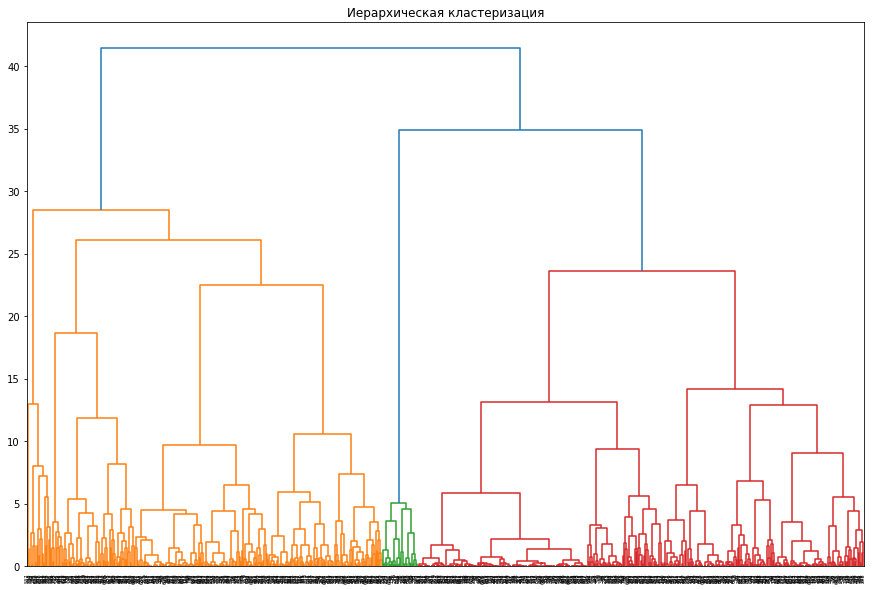

In [138]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

### Кластеризация на основании алгоритма K-Means

#### Обучение модели, кластеризация

In [141]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster'] = labels
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,cluster
0,0,3,22.00,1,0,A/5 21171,7.25,1
1,1,1,38.00,1,0,PC 17599,71.28,3
2,1,3,26.00,0,0,STON/O2. 3101282,7.92,0
3,1,1,35.00,1,0,113803,53.10,3
4,0,3,35.00,0,0,373450,8.05,1


#### Средние значения признаков для кластеров

In [142]:
df['cluster'] = labels
df.groupby(['cluster']).mean().T

cluster,0,1,2,3
Survived,1.00,0.00,0.10,0.67
Pclass,2.47,2.70,2.90,1.02
Age,22.63,29.92,16.25,39.28
SibSp,0.40,0.24,2.90,0.46
Parch,0.55,0.11,2.31,0.40
Fare,17.99,12.51,36.71,88.65


## Выводы

* Больше вснго выживших в 0 кластере, средний возраст 22,6 лет, 0.4 и 0.5 количество родственников первого-второго порядка в среднем, цена билета ожна из самых маленьких.
* На втором месте по выжившим 1 класс и самые дорогие билеты(думал тут выживших наибольшее количество), средний возраст 1 класса ожидаемо около 40
* 1 и 2 кластер можно объединить, низкая выживаемость, ближе к 3 классу бидеты, дети и их родители...